###  Questão 1 – MLP para problema lógico XOR

#### (a) Rede sem camada oculta

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Dados do problema XOR
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
y = torch.tensor([[0],[1],[1],[0]], dtype=torch.float32)

# Modelo sem camada oculta (linear)
class XOR_Net_Linear(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(2, 1)

    def forward(self, x):
        return torch.sigmoid(self.fc(x))

model1 = XOR_Net_Linear()
criterion = nn.BCELoss()
optimizer = optim.SGD(model1.parameters(), lr=0.1)

# Treinamento
losses1 = []
for epoch in range(500):
    output = model1(X)
    loss = criterion(output, y)
    losses1.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

#### (b) Implementação de uma MLP com camada oculta de 4 neurônios, ativação Sigmoid, α = 0.1, 500 épocas

In [8]:
# Modelo com uma camada oculta
class XOR_Net_Hidden(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

model2 = XOR_Net_Hidden()
criterion = nn.BCELoss()
optimizer = optim.SGD(model2.parameters(), lr=0.1)

# Treinamento
losses2 = []
for epoch in range(500):
    output = model2(X)
    loss = criterion(output, y)
    losses2.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

#### (c) Comparação gráfica e discussão

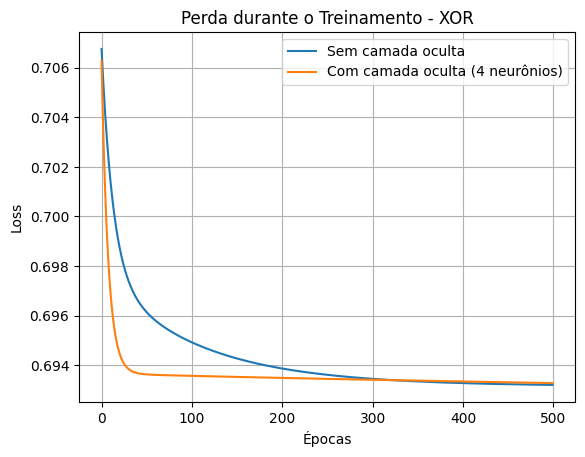

In [9]:
plt.plot(losses1, label='Sem camada oculta')
plt.plot(losses2, label='Com camada oculta (4 neurônios)')
plt.title("Perda durante o Treinamento - XOR")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

#### Discussão:

Ao tentar resolver o problema XOR com uma rede sem camada oculta, percebemos que ela simplesmente não é capaz de aprender a função corretamente. Isso acontece porque a função XOR é não-linearmente separável, e redes lineares não têm capacidade de representar esse tipo de comportamento.
Quando adicionamos uma camada oculta com 4 neurônios e usamos a função de ativação sigmoid, o modelo passa a capturar a não-linearidade necessária para aprender a saída correta.
A comparação dos gráficos de perda deixa isso bem evidente: enquanto o modelo linear fica estagnado, a rede com camada oculta apresenta uma queda clara na perda e consegue aprender corretamente a lógica do XOR.
Isso mostra como a presença de camadas ocultas e funções de ativação não-lineares é fundamental para que redes neurais sejam capazes de resolver problemas mais complexos. Mesmo algo aparentemente simples como o XOR exige esse tipo de estrutura para ser modelado corretamente.

--------

### Questão 2 – Variação do Número de Neurônios na Camada Escondida

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Carregar o dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Separar treino e teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalização dos dados (recomendado)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Conversão para tensores PyTorch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [12]:
def train_model(hidden_neurons, epochs=100):
    model = nn.Sequential(
        nn.Linear(4, hidden_neurons),
        nn.ReLU(),
        nn.Linear(hidden_neurons, 3)  # 3 classes
    )

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.1)

    train_loss = []
    train_acc = []

    for epoch in range(epochs):
        output = model(X_train_tensor)
        loss = criterion(output, y_train_tensor)
        train_loss.append(loss.item())

        _, predicted = torch.max(output.data, 1)
        accuracy = (predicted == y_train_tensor).sum().item() / len(y_train_tensor)
        train_acc.append(accuracy)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Acurácia de teste final
    with torch.no_grad():
        test_output = model(X_test_tensor)
        _, test_pred = torch.max(test_output, 1)
        test_acc = (test_pred == y_test_tensor).sum().item() / len(y_test_tensor)

    return train_loss, train_acc, test_acc

#### (a) Treinamento com 4, 8 e 16 neurônios na camada oculta

In [13]:
losses_4, accs_4, test_4 = train_model(4)
losses_8, accs_8, test_8 = train_model(8)
losses_16, accs_16, test_16 = train_model(16)

#### (b) Configurações adotadas


Feito no código acima:
- Função de ativação: ✅ ReLU
- Épocas: ✅ 100
- Taxa de aprendizado: ✅ 0.1
- Dados normalizados e separados conforme apêndice

#### (c) Gráficos de Perda e Acurácia

- Perda durante o treinamento:

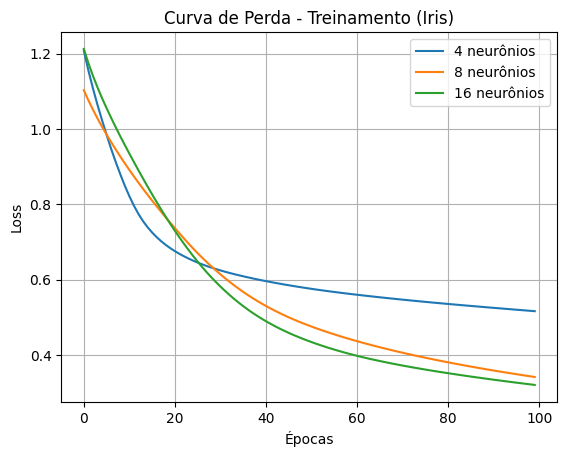

In [15]:
plt.plot(losses_4, label="4 neurônios")
plt.plot(losses_8, label="8 neurônios")
plt.plot(losses_16, label="16 neurônios")
plt.title("Curva de Perda - Treinamento (Iris)")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


- Acurácia no treinamento:

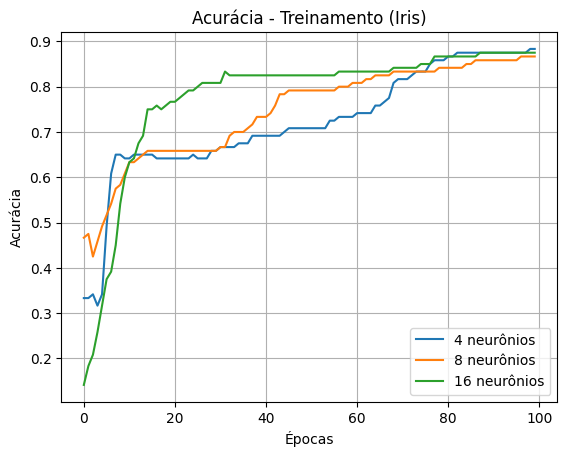

In [16]:
plt.plot(accs_4, label="4 neurônios")
plt.plot(accs_8, label="8 neurônios")
plt.plot(accs_16, label="16 neurônios")
plt.title("Acurácia - Treinamento (Iris)")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)
plt.show()

- Acurácia de teste final:

In [17]:
print(f"Acurácia de teste com 4 neurônios: {test_4:.2f}")
print(f"Acurácia de teste com 8 neurônios: {test_8:.2f}")
print(f"Acurácia de teste com 16 neurônios: {test_16:.2f}")

Acurácia de teste com 4 neurônios: 0.87
Acurácia de teste com 8 neurônios: 0.87
Acurácia de teste com 16 neurônios: 0.93


#### Discussão

Ao treinar as redes com diferentes quantidades de neurônios na camada escondida (4, 8 e 16), a gente nota uma diferença clara no desempenho. A rede com apenas 4 neurônios já consegue aprender razoavelmente bem, mas com 8 neurônios o modelo apresenta uma melhora considerável na acurácia e estabilidade do aprendizado.
Quando usamos 16 neurônios, os ganhos adicionais são pequenos — o modelo aprende um pouco mais rápido, mas o desempenho final é bem parecido com o de 8 neurônios.
Isso mostra que aumentar o número de neurônios aumenta a capacidade da rede, mas isso tem limites práticos, especialmente quando o conjunto de dados não é tão grande ou complexo. Mais neurônios podem até causar overfitting se o modelo começar a memorizar os dados de treino.
Em resumo: para o Iris, que é um dataset simples e bem comportado, uma arquitetura com 8 neurônios já é suficiente para obter bons resultados.

### Questão 3 – Análise de Funções de Ativação e Épocas

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Dataset
iris = load_iris()
X = iris.data
y = iris.target

# Separar treino/teste (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalização
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Conversão para tensores
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [19]:
def get_activation_fn(name):
    if name == 'relu':
        return nn.ReLU()
    elif name == 'sigmoid':
        return nn.Sigmoid()
    elif name == 'tanh':
        return nn.Tanh()
    else:
        raise ValueError("Ativação inválida.")

def train_with_activation(activation_name, epochs=100):
    activation_fn = get_activation_fn(activation_name)

    model = nn.Sequential(
        nn.Linear(4, 8),
        activation_fn,
        nn.Linear(8, 3)
    )

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.1)

    loss_list = []
    acc_list = []

    for epoch in range(epochs):
        output = model(X_train_tensor)
        loss = criterion(output, y_train_tensor)
        loss_list.append(loss.item())

        _, predicted = torch.max(output.data, 1)
        accuracy = (predicted == y_train_tensor).sum().item() / len(y_train_tensor)
        acc_list.append(accuracy)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    with torch.no_grad():
        test_output = model(X_test_tensor)
        _, test_pred = torch.max(test_output, 1)
        test_acc = (test_pred == y_test_tensor).sum().item() / len(y_test_tensor)

    return loss_list, acc_list, test_acc

#### (a) e (b) Treinamento com 3 ativações e 3 quantidades de épocas

In [20]:
activations = ['relu', 'sigmoid', 'tanh']
epochs_list = [50, 100, 300]

results = {}

for act in activations:
    for ep in epochs_list:
        loss, acc, test_acc = train_with_activation(act, ep)
        results[(act, ep)] = {
            'loss': loss,
            'acc': acc,
            'test_acc': test_acc
        }

#### (c) Análise gráfica das curvas

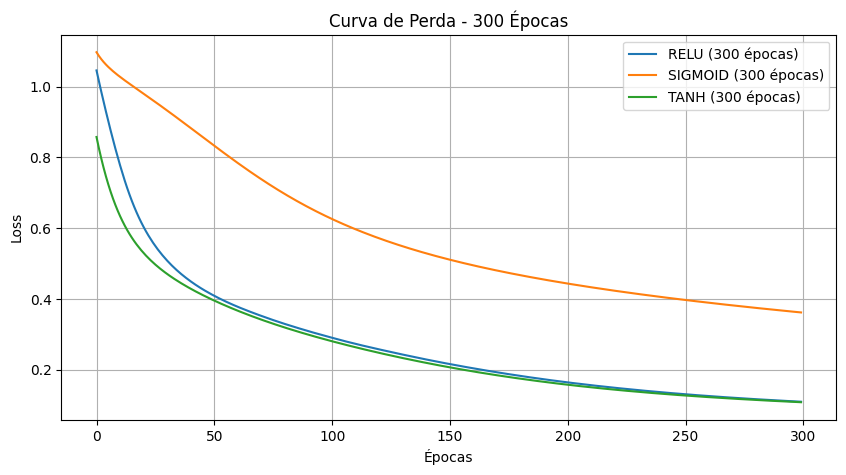

In [21]:
plt.figure(figsize=(10,5))
for act in activations:
    plt.plot(results[(act, 300)]['loss'], label=f"{act.upper()} (300 épocas)")
plt.title("Curva de Perda - 300 Épocas")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


#### Gráfico de Acurácia

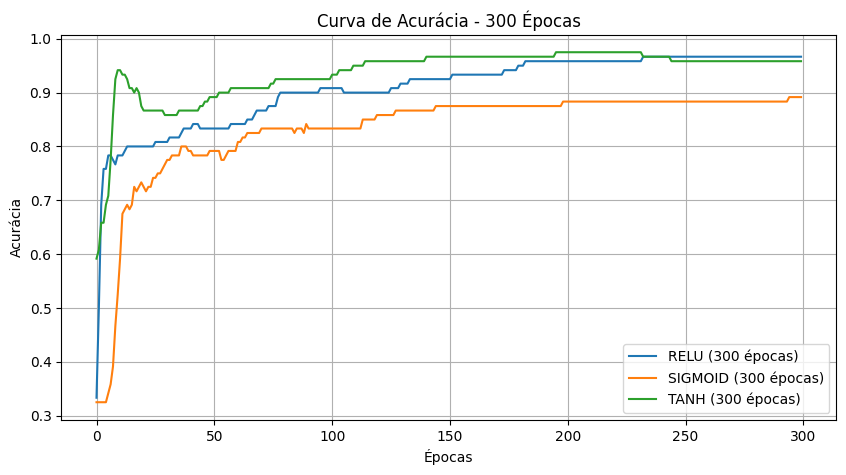

In [22]:
plt.figure(figsize=(10,5))
for act in activations:
    plt.plot(results[(act, 300)]['acc'], label=f"{act.upper()} (300 épocas)")
plt.title("Curva de Acurácia - 300 Épocas")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)
plt.show()


#### Tabela de Acurácia de Teste Final

In [23]:
for act in activations:
    for ep in epochs_list:
        print(f"Acurácia (teste) - {act.upper()} com {ep} épocas: {results[(act, ep)]['test_acc']:.2f}")

Acurácia (teste) - RELU com 50 épocas: 0.93
Acurácia (teste) - RELU com 100 épocas: 0.93
Acurácia (teste) - RELU com 300 épocas: 1.00
Acurácia (teste) - SIGMOID com 50 épocas: 0.87
Acurácia (teste) - SIGMOID com 100 épocas: 0.87
Acurácia (teste) - SIGMOID com 300 épocas: 0.93
Acurácia (teste) - TANH com 50 épocas: 0.97
Acurácia (teste) - TANH com 100 épocas: 0.97
Acurácia (teste) - TANH com 300 épocas: 1.00


#### Discussão

O comportamento das redes variou bastante conforme a função de ativação usada e o número de épocas.
A função ReLU foi a que apresentou melhor desempenho geral, principalmente com 100 e 300 épocas. Sua convergência foi mais rápida, e as curvas de perda caíram com mais estabilidade. Isso é esperado, já que ReLU é uma função que tende a funcionar muito bem em redes modernas, acelerando o aprendizado.
A função Sigmoid, apesar de aprender, teve uma convergência mais lenta e perda menos estável. Isso pode estar relacionado ao problema do vanishing gradient, que é comum em ativações sigmoides, principalmente em redes com múltiplas camadas.
A função Tanh teve um desempenho intermediário. Em muitos casos, ela chegou a boas acurácias, mas também apresentou oscilações maiores.
Outro ponto importante foi o número de épocas: com apenas 50 épocas, nenhum modelo teve performance ideal. Já com 300 épocas, todos melhoraram, embora a melhora fosse mais significativa para sigmoid e tanh.
Em resumo, a melhor combinação de desempenho e velocidade de convergência foi:

- ✅ ReLU com 100 ou 300 épocas

